In [5]:
#%%
import polars as pl
import numpy as np
import pandas as pd
from scipy import signal
import io
from scipy import ndimage
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
from scipy.signal import welch
#%%
df = pd.read_parquet('./labels&feature/'+'yd003.parquet', engine='pyarrow')
ma = df[['z']]/9800
ma.index = pd.to_datetime(df['Unnamed: 0']).astype(np.int64)
ma = ma.dropna()
fs = 1e-09**-1/np.median(np.diff(ma.index.values.astype(np.int64)))
tm = pd.to_datetime(ma.index)
#%%
def bandpass_filt(sig,cutoff,fs,mode):
    nyq = 0.5*fs
    wn = cutoff/nyq
    sos = signal.butter(4, wn, btype=mode,output='sos')
    if isinstance(sig,pd.DataFrame):
        # if you gave in a dataframe, get it back with the appropriate columns
        return pd.DataFrame(data=signal.sosfiltfilt(sos,sig,axis=0),columns=sig.columns,index=sig.index)
    elif isinstance(sig,pd.Series):
        return pd.DataFrame(data=signal.sosfiltfilt(sos,sig,axis=0),columns=[sig.name],index=sig.index)
    else:
        return signal.sosfiltfilt(sos,sig,axis=0)

In [13]:
# %%
sn_df = bandpass_filt(ma,(70,490),fs,'bandpass')
sn_df.index = pd.to_datetime(ma.index)
# %%
pw = sn_df**2
# pw.index = pd.to_datetime(ma.index).astype(np.int64)
pw = pw.resample('2min').mean()

In [10]:
pw.index = pd.to_datetime(ma.index)
pw = pw.resample('2min').sum()


In [21]:
sn_df.index[10710000]

Timestamp('2023-04-18 23:59:44.053000')

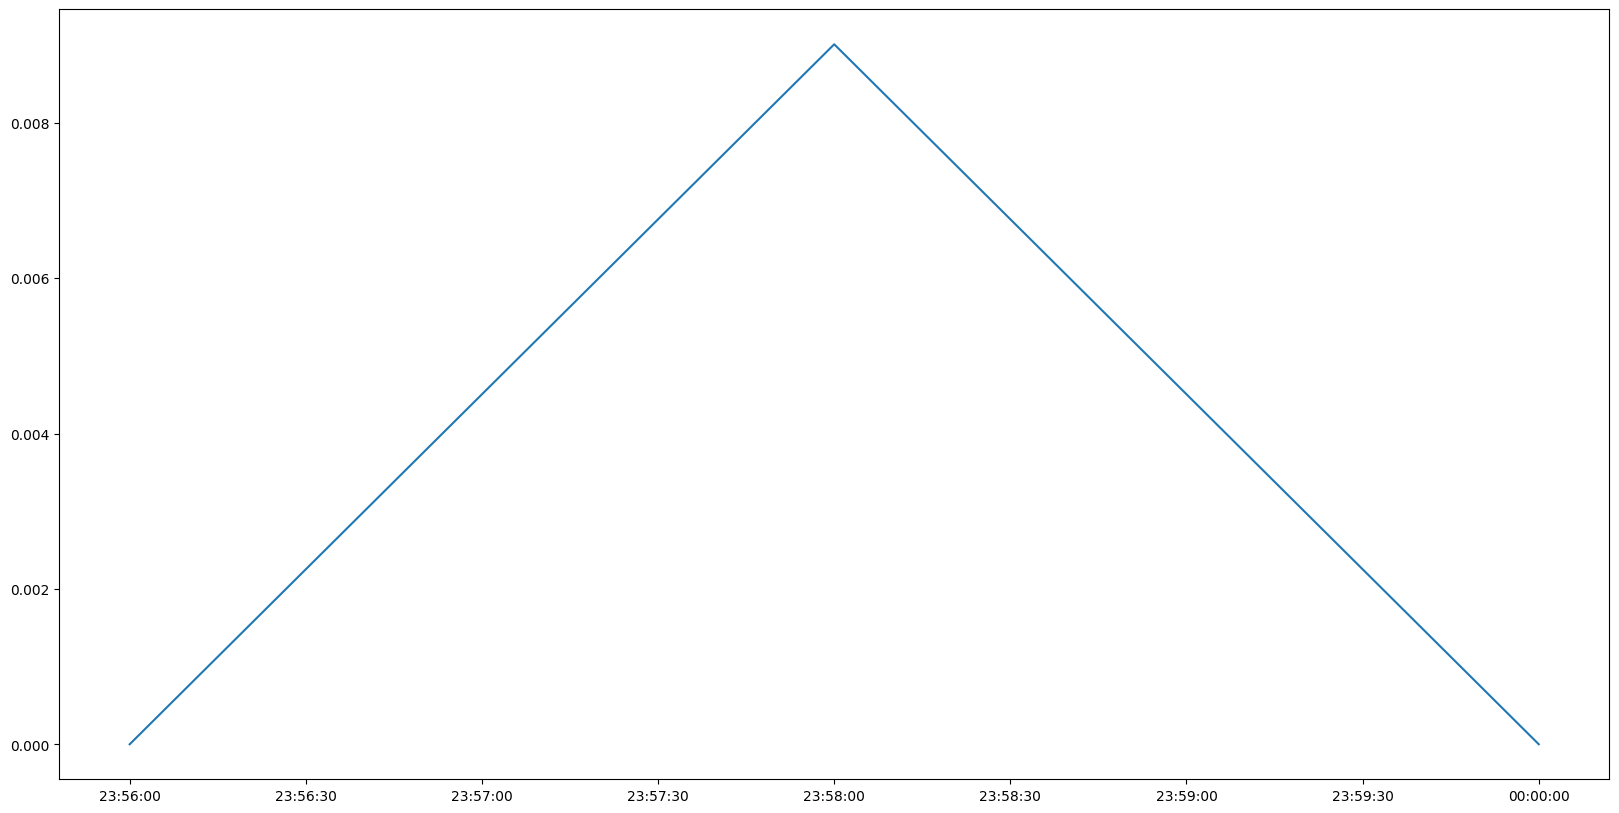

In [17]:
plt.figure(figsize=(20,10))
plt.plot(pw[88:91])